In [3]:
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

import keras
import imageio
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

video_path = r"S:\Wormax\data\nn\train.mp4"
validation_video_path = r"S:\Wormax\data\nn\last_hour.mp4"

resolution = (96, 60)
input_frames_number = 5

In [2]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3), input_shape=(None, resolution[1], resolution[0], 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3), padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3), padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3), padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=3, kernel_size=(3, 3, 3), activation='sigmoid', padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adam')


In [3]:
seq.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, None, 60, 96, 40)  62080     
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 60, 96, 40)  160       
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, None, 60, 96, 40)  115360    
_________________________________________________________________
batch_normalization_2 (Batch (None, None, 60, 96, 40)  160       
_________________________________________________________________
conv_lst_m2d_3 (ConvLSTM2D)  (None, None, 60, 96, 40)  115360    
_________________________________________________________________
batch_normalization_3 (Batch (None, None, 60, 96, 40)  160       
_________________________________________________________________
conv_lst_m2d_4 (ConvLSTM2D)  (None, None, 60, 96, 40) 

In [4]:
def help_generator(video_path, offset=0):
    while True:
        cap = cv2.VideoCapture(video_path)
        for i in range(offset):
            ret, frame = cap.read()

        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = frame / 255
            yield frame
            

def generator(video_path, input_frames_number, batch_size, buffer_size, offset=0):
    buffer = []
    gen = help_generator(video_path, offset)
    while True:
        while len(buffer) < buffer_size:
            buffer.append([np.array([next(gen) for i in range(input_frames_number)]),
                           np.array([next(gen) for i in range(input_frames_number)])])
        np.random.shuffle(buffer)
        batch = buffer[:batch_size]
        x, y = zip(*batch)
        buffer = buffer[batch_size:]
        yield np.array(x), np.array(y)
        
gen = generator(video_path,
                input_frames_number,
                batch_size=32,
                buffer_size=1024)
x, y = next(gen)
print(x.shape)
print(y.shape)

(32, 5, 60, 96, 3)
(32, 5, 60, 96, 3)


In [ ]:
from keras.callbacks import TensorBoard
from keras_tqdm import TQDMNotebookCallback
import time

gen = generator(video_path,
                input_frames_number,
                batch_size=10,
                buffer_size=256)

val_gen = generator(validation_video_path, 
                    input_frames_number,
                    batch_size=10,
                    buffer_size=256)


seq.fit_generator(gen,
                  steps_per_epoch=200,
                  validation_steps=20,
                  epochs=500,
                  shuffle=True,
                  validation_data=val_gen,
                  callbacks=[TensorBoard(log_dir=f'/tmp/video_worm-{time.time()}'),
                            TQDMNotebookCallback()],
                  verbose=0)


In [6]:
from keras.models import load_model

# autoencoder.save('my_model.h5') 
# del autoencoder  # deletes the existing model
seq = load_model('weights.04-0.22.hdf5')

In [23]:
gen = generator(video_path, input_frames_number=30, batch_size=1, buffer_size=100, offset=100)
for j in range(100):
    x, y = next(gen)
    frames = x[0][:input_frames_number]

    prediction = seq.predict(np.expand_dims(frames, axis=0))
#         print(frames.shape, prediction[0].shape)
    frames = np.vstack((frames, prediction[0]))

    print(frames.shape)
    for i in range(0, input_frames_number*2):
        i = i % 130
        img = frames[i]
        cv2.imshow('name', cv2.resize(img, (960, 800), interpolation=cv2.INTER_NEAREST))
        cv2.waitKey(50)

(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60, 96, 3)
(10, 60,

KeyboardInterrupt: 

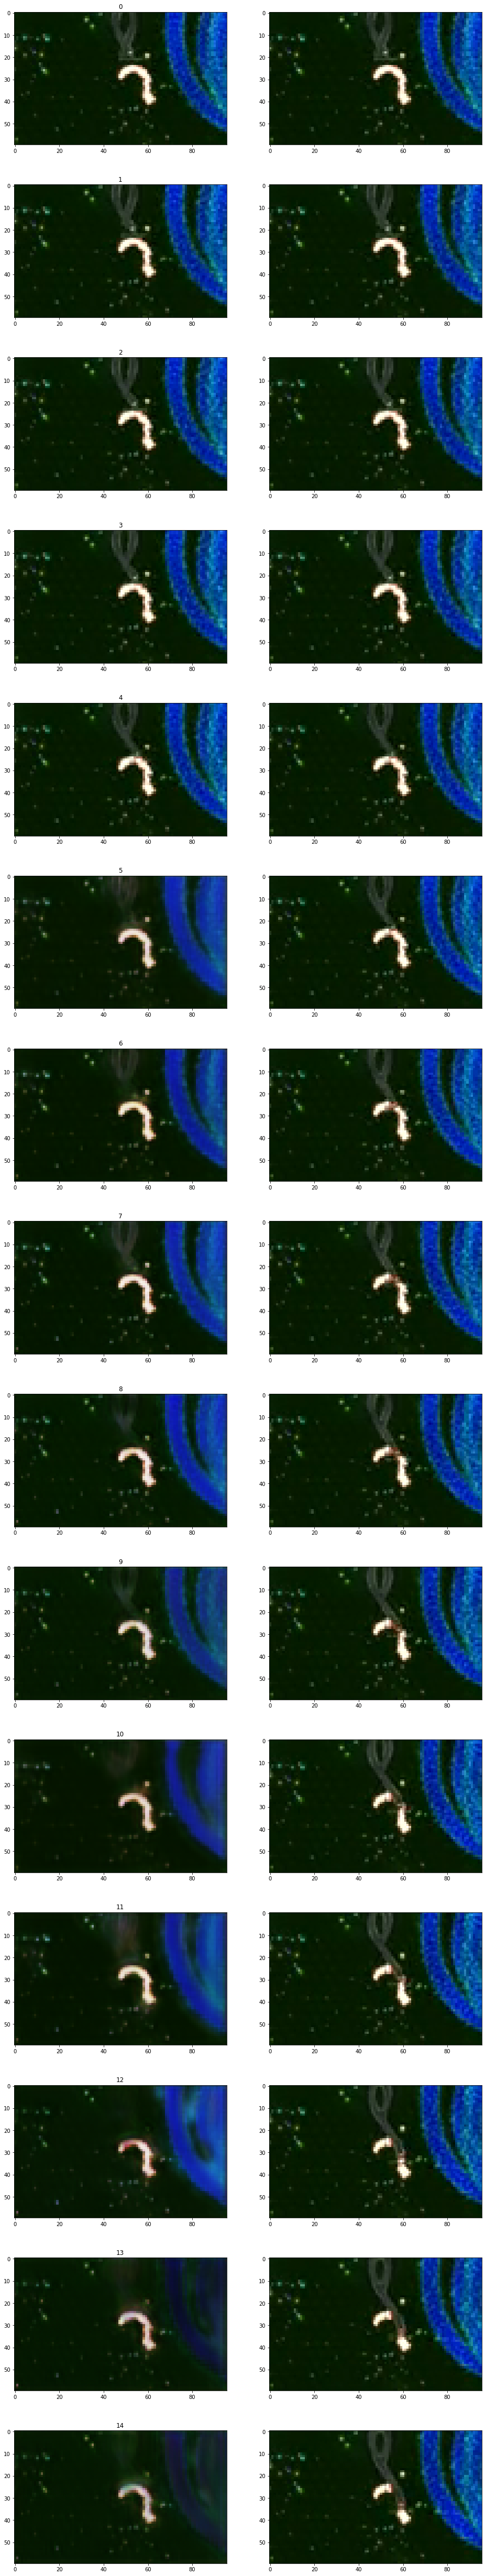

In [56]:
gen = generator(video_path, input_frames_number=30, batch_size=1, buffer_size=100, offset=100)
# for j in range(100):
x, y = next(gen)
frames = x[0][:input_frames_number]

prediction = seq.predict(np.expand_dims(frames, axis=0))
frames = np.vstack((frames, prediction[0]))

prediction = seq.predict(np.expand_dims(frames[-input_frames_number:], axis=0))
frames = np.vstack((frames, prediction[0]))

plt.figure(figsize=(16, 6 * len(frames)))
for i in range(0, len(frames)):
    img1 = frames[i]
    img2 = x[0][i]

    plt.subplot(len(frames), 2, i * 2 + 1)
    plt.title(i)
    plt.imshow(img1, interpolation='nearest')

    plt.subplot(len(frames), 2, i * 2 + 2)
    plt.imshow(img2, interpolation='nearest')



In [55]:
def delme_gen():
    
    gen = generator(video_path, input_frames_number=30, batch_size=1, buffer_size=100, offset=100)
    while True:
        x, y = next(gen)
        frames = x[0][:input_frames_number]

        prediction = seq.predict(np.expand_dims(frames, axis=0))[0]

        for i in range(len(prediction)):
            yield prediction[i]
            
        for i in range(10):
            prediction = seq.predict(np.expand_dims(prediction, axis=0))[0]
            for i in range(len(prediction)):
                yield prediction[i]
            
gen = delme_gen()
while True:
    cv2.imshow('1', cv2.resize(next(gen), (960, 800), interpolation=cv2.INTER_NEAREST))
    cv2.waitKey(33)


KeyboardInterrupt: 